In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import time
from stl import mesh



# Indlæs data fra Excel-filen
excel_file_path = "C:/Users/Silas/source/repos/StlProject/simplemaps_worldcities_basicv1.77/worldcities.xlsx"
df = pd.read_excel(excel_file_path)
conn = sqlite3.connect('worldcities.db')
df.to_sql('worldcities', conn, if_exists='replace', index=False)


47653

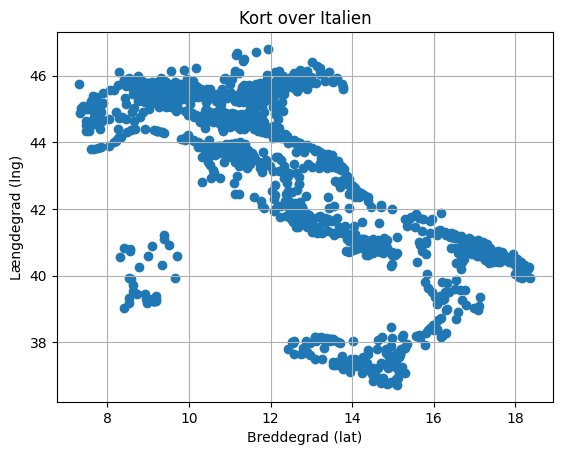

In [ ]:
# Indlæs data fra databasen til pd og plot
df = pd.read_sql_query("SELECT lat, lng, population FROM worldcities WHERE iso2 = 'IT'", conn)

plt.scatter(df['lng'], df['lat'])
plt.xlabel('Breddegrad (lat)')
plt.ylabel('Længdegrad (lng)')
plt.title('Kort over Italien')
plt.grid(True)
plt.show()

In [ ]:
# Funktion til at finde de k nærmeste punkter
def euclidean_distance(point, points, k):
    points = np.asarray(points)
    dist_2 = np.sum((points - point)**2, axis=1)
    distances = np.sqrt(dist_2)
    return np.argsort(distances)[1:k+1]


KeyboardInterrupt: 

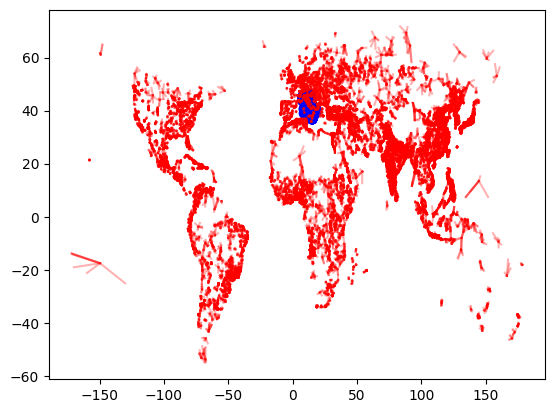

In [ ]:
koordinates = df[['lat', 'lng']].values

k = 6
closest_koordinates = []
for koordinate in koordinates:
    closest_koordinates.append(euclidean_distance(koordinate, koordinates, k+1))

# Plot punkterne
plt.scatter(df['lng'], df['lat'], color='blue')

# Træk linjer fra hvert punkt til dets 5 nærmeste naboer
for i, neighbors in enumerate(closest_points):
    for neighbor_index in neighbors:
        plt.plot([points[i][1], points[neighbor_index][1]], [points[i][0], points[neighbor_index][0]], color='red', alpha=0.3)

plt.xlabel('Breddegrad (Lat)')
plt.ylabel('Længdegrad (Long)')
plt.title('--')

plt.grid(True)
plt.show()

print(len(points))

In [ ]:
# execution_times = {}
# for k in range(1, 25):
#     start_time = time.time()
    
#     closest_points = []
#     for point in points:
#         closest_points.append(euclidean_distance(point, points, k + 1))
    
#     plt.figure()
#     plt.scatter(df['lng'], df['lat'], color='blue')
#     for i, neighbors in enumerate(closest_points):
#         for neighbor_index in neighbors:
#             plt.plot([points[i][1], points[neighbor_index][1]], [points[i][0], points[neighbor_index][0]], color='red', alpha=0.3)
#     plt.xlabel('Breddegrad (Lat)')
#     plt.ylabel('Længdegrad (Long)')
#     plt.title(f'k = {k}')
#     plt.grid(True)
#     plt.show()

#     end_time = time.time()
#     execution_times[k] = end_time - start_time

# # Print execution times
# for k, exec_time in execution_times.items():
#     print(f"Execution time for k={k}: {exec_time:.1f} seconds")

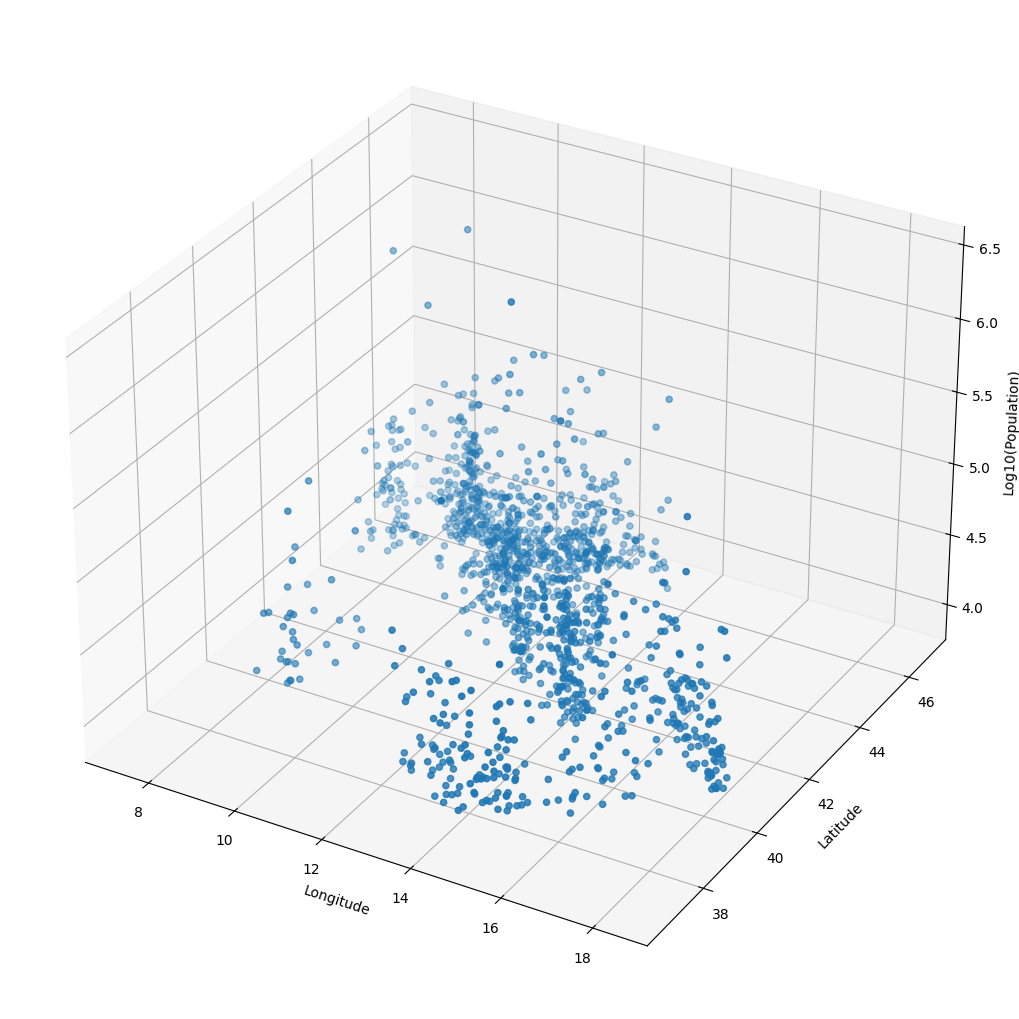

In [ ]:
# Add a new column for the log_10 of the population
df['log_population'] = np.log10(df['population'])
vertices = df[['lng', 'lat', 'log_population']].values

# make 3d plot of vertices
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Log10(Population)')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()



In [ ]:
#Define the triangles
#only combinations of 3 points from the closest_indices
triangles = []
for i, neighbors in enumerate(closest_koordinates):
    for neighbor_index in neighbors:
        for neighbor_index2 in neighbors:
            if neighbor_index2 != neighbor_index:
                triangles.append([i, neighbor_index, neighbor_index2])

triangles = np.array(triangles)

print(len(triangles))

56910


In [ ]:

shape = mesh.Mesh(np.zeros(triangles.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(triangles):
    for j in range(3):
        shape.vectors[i][j] = vertices[f[j], :]

shape.save("Italy.stl")

In [ ]:
unique_triangles = set()
for triangle in triangles:
    sorted_triangle = tuple(sorted(triangle))
    unique_triangles.add(sorted_triangle)
    
newTriangles = np.array(list(unique_triangles))

print(len(newTriangles))

18304


In [ ]:
shape = mesh.Mesh(np.zeros(newTriangles.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(newTriangles):
    for j in range(3):
        shape.vectors[i][j] = vertices[f[j], :]

shape.save("Italy2.stl") 